In [1]:
import pandas as pd
import pyodbc

# Impostare i dettagli della connessione (aggiorna con i tuoi dettagli)
server = 'pw2-g2-y2-sqlserver.database.windows.net'
database = 'BC_Data'
username = 'group2_admin_pw2'
password = 'AlfaBravo2'

# Creare una stringa di connessione
conn_str = (
    f'DRIVER={{ODBC Driver 17 for SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password};'
)

# try:
    # Connessione al database
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Esempio di query di selezione
cursor.execute("SELECT * FROM ml.nation")

# Recuperare i risultati della query
rows = cursor.fetchall()

# Creare un DataFrame pandas con i risultati
df = pd.DataFrame([tuple(row) for row in rows], columns=[desc[0] for desc in cursor.description])



In [2]:
df

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Timor-Leste,Both,All ages,Breast cancer,Number,1990,22.7709528,30.8629702,16.3369074
1,Deaths,Timor-Leste,Both,All ages,Breast cancer,Percent,1990,0.0029145,0.0038595,0.0021936
2,Deaths,Timor-Leste,Both,All ages,Breast cancer,Rate,1990,2.9083065,3.9418191,2.0865501
3,Deaths,Timor-Leste,Both,Age-standardized,Breast cancer,Rate,1990,6.4458711,8.4105684,4.6504682
4,Deaths,Haiti,Both,All ages,Breast cancer,Number,1990,499.4780262,633.9067779,391.0713797
...,...,...,...,...,...,...,...,...,...,...
51403,Incidence,Venezuela,Both,All ages,Breast cancer,Number,2015,7655.8805490,9013.2026220,6473.2309470
51404,Incidence,Venezuela,Both,All ages,Breast cancer,Percent,2015,0.0000486,0.0000575,0.0000407
51405,Incidence,Venezuela,Both,All ages,Breast cancer,Rate,2015,25.6378063,30.1831698,21.6773812
51406,Incidence,Venezuela,Both,Age-standardized,Breast cancer,Percent,2015,0.0000514,0.0000607,0.0000433


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51408 entries, 0 to 51407
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   measure   51408 non-null  object
 1   location  51408 non-null  object
 2   sex       51408 non-null  object
 3   age       51408 non-null  object
 4   cause     51408 non-null  object
 5   metric    51408 non-null  object
 6   year      51408 non-null  object
 7   val       51408 non-null  object
 8   upper     51408 non-null  object
 9   lower     51408 non-null  object
dtypes: object(10)
memory usage: 3.9+ MB


In [9]:
df.describe()

,measure,location,sex,age,cause,metric,year,val,upper,lower
count,51408,51408,51408,51408,51408,51408,51408,51408,51408,51408
unique,2,204,1,2,1,3,28,41460,41598,41337
top,Incidence,Timor-Leste,Both,All ages,Breast cancer,Rate,1990,0.0000085,0.0000258,0.0000065
freq,28560,252,51408,34272,51408,22848,1836,42,40,55


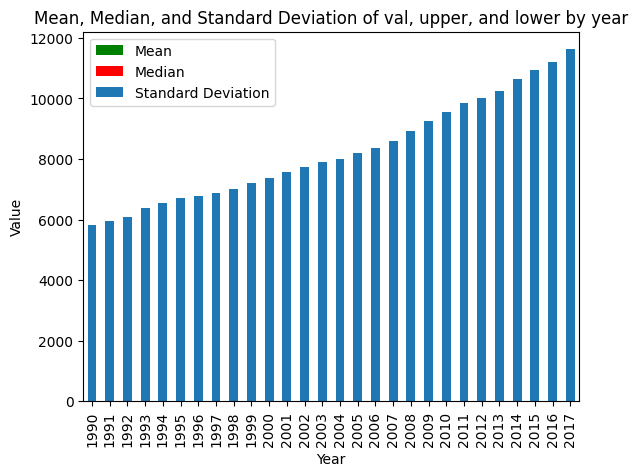

In [ ]:
import matplotlib.pyplot as plt

# Group the dataframe by 'year' and calculate the mean, median, and standard deviation
grouped_df = df.groupby('year')[['val', 'upper', 'lower']].agg(['mean', 'median', 'std'])

# Plot the mean values
grouped_df['val']['mean'].plot(kind='bar', label='Mean',color='green')

# Plot the median values
grouped_df['val']['median'].plot(kind='bar', label='Median',color='red')

# Plot the standard deviation values
grouped_df['val']['std'].plot(kind='bar', label='Standard Deviation')

# Set the plot title and labels
plt.title('Mean, Median, and Standard Deviation of val, upper, and lower by year')
plt.xlabel('Year')
plt.ylabel('Value')

# Show the legend
plt.legend()

# Show the plot
plt.show()


[('Deaths', 'Timor-Leste', 'Both', 'All ages', 'Breast cancer', 'Number', '1990', Decimal('22.7709528'), Decimal('30.8629702'), Decimal('16.3369074')),
 ('Deaths', 'Timor-Leste', 'Both', 'All ages', 'Breast cancer', 'Percent', '1990', Decimal('0.0029145'), Decimal('0.0038595'), Decimal('0.0021936')),
 ('Deaths', 'Timor-Leste', 'Both', 'All ages', 'Breast cancer', 'Rate', '1990', Decimal('2.9083065'), Decimal('3.9418191'), Decimal('2.0865501')),
 ('Deaths', 'Timor-Leste', 'Both', 'Age-standardized', 'Breast cancer', 'Rate', '1990', Decimal('6.4458711'), Decimal('8.4105684'), Decimal('4.6504682')),
 ('Deaths', 'Haiti', 'Both', 'All ages', 'Breast cancer', 'Number', '1990', Decimal('499.4780262'), Decimal('633.9067779'), Decimal('391.0713797')),
 ('Deaths', 'Haiti', 'Both', 'All ages', 'Breast cancer', 'Percent', '1990', Decimal('0.0059427'), Decimal('0.0073742'), Decimal('0.0046578')),
 ('Deaths', 'Haiti', 'Both', 'All ages', 'Breast cancer', 'Rate', '1990', Decimal('7.8587058'), Decimal